In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
exportacion_cafe = pd.read_csv('../data_cafe/Coffee_export.csv')

In [21]:
def verificar_nulos(exportacion_cafe):
    """
    Verifica si hay valores nulos en un DataFrame y devuelve True si los hay, False en caso contrario.
    
    Parameters:
        df (DataFrame): El DataFrame a verificar.
    
    Returns:
        bool: True si hay valores nulos, False en caso contrario.
    """
    return exportacion_cafe.isnull().values.any()

verificar_nulos(exportacion_cafe)


False

In [23]:
features = exportacion_cafe.columns[1:-1]  # Usamos todos los años como características excepto 'Total_export'
X = exportacion_cafe[features]
y = exportacion_cafe['2019']  

In [24]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Entrenar un modelo de Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [26]:
# Hacer predicciones
predictions = model.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'MSE: {mse}, R2 Score: {r2}')

MSE: 3415241891160000.0, R2 Score: 0.6313605938370082


In [8]:
from sklearn.model_selection import cross_val_score

# Preparar los datos
X = coffe_export.drop(['Country', 'Total_export'], axis=1)  # Características
y = coffe_export['Total_export']  # Variable objetivo

# Crear el modelo
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Realizar la validación cruzada
scores = cross_val_score(rf, X, y, cv=5)

# Imprimir los resultados de la validación cruzada
print(f'Scores: {scores}')
print(f'Mean score: {scores.mean()}')

Scores: [0.73085291 0.99565871 0.93731266 0.979042   0.83881937]
Mean score: 0.8963371293058847


Scores: [0.73085291 0.99565871 0.93731266 0.979042   0.83881937]
Mean score: 0.8963371293058847


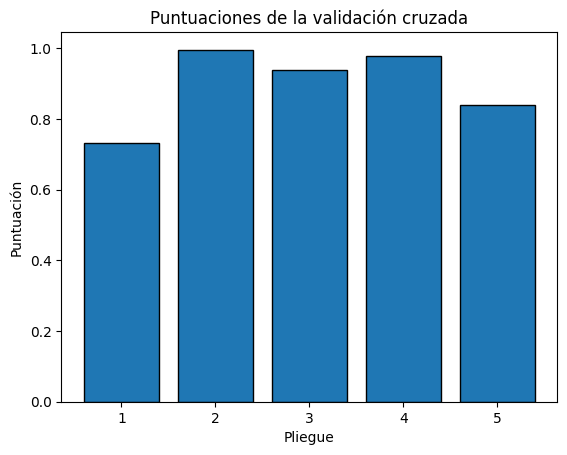

In [14]:
# Realizar la validación cruzada
scores = cross_val_score(rf, X, y, cv=5)

# Crear un gráfico de barras de las puntuaciones
plt.bar(np.arange(1, 6), scores, edgecolor='black')
plt.xlabel('Pliegue')
plt.ylabel('Puntuación')
plt.title('Puntuaciones de la validación cruzada')

# Imprimir los resultados de la validación cruzada
print(f'Scores: {scores}')
print(f'Mean score: {scores.mean()}')

In [16]:
# Guarda el modelo
import pickle

archivo= 'modelo_cafe.pkl'
pickle.dump(rf, open(archivo, 'wb'))